In [218]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

In [219]:
# importing data
day_df = pd.read_csv("day.csv", low_memory=False)

# Reading and understanding data

In [220]:
day_df.shape

(730, 16)

	### Columns names and there description:
    - instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [221]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/1/2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/1/2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/1/2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/1/2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [222]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [223]:
## Mean and Median are almost same for all features, which means data is consecutive or evenly spaced

In [224]:
# Finding null values if any in all features
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [225]:
# No null values found

In [226]:
# Finding the unique values, so that I can find the categorical featues 
unique_values = [{"Column Name":col, "unique length":len(day_df[col].unique()), "unique values":day_df[col].unique()} for col in day_df.columns.to_list()]

In [227]:
pd.DataFrame(unique_values)

,Column Name,unique length,unique values
0,instant,730,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,dteday,730,"[1/1/2018, 2/1/2018, 3/1/2018, 4/1/2018, 5/1/2..."
2,season,4,"[1, 2, 3, 4]"
3,yr,2,"[0, 1]"
4,mnth,12,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]"
5,holiday,2,"[0, 1]"
6,weekday,7,"[6, 0, 1, 2, 3, 4, 5]"
7,workingday,2,"[0, 1]"
8,weathersit,3,"[2, 1, 3]"
9,temp,498,"[14.110847, 14.902598, 8.050924, 8.2, 9.305237..."


In [228]:
# dropped index column
day_df.drop("instant", axis=1, inplace=True)

In [229]:
day_df.shape

(730, 15)

In [230]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.7+ KB


# Visualising the data

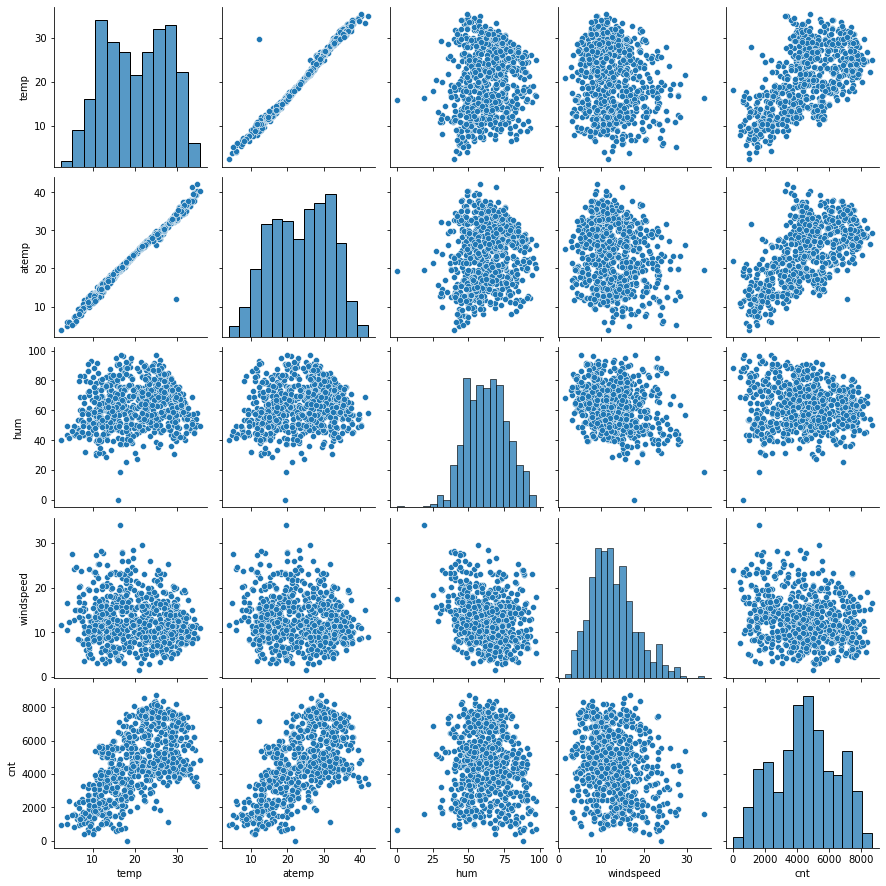

In [231]:
#creating a pair plot for all numerical features
numerical_features = ['temp','atemp','hum','windspeed',"cnt"]
sns.pairplot(data=day_df, vars=numerical_features)
plt.show()

In [232]:
# We can observe there is a linear relationship between atemp and temp, there is a linear relationship is alos found between cnt and temp

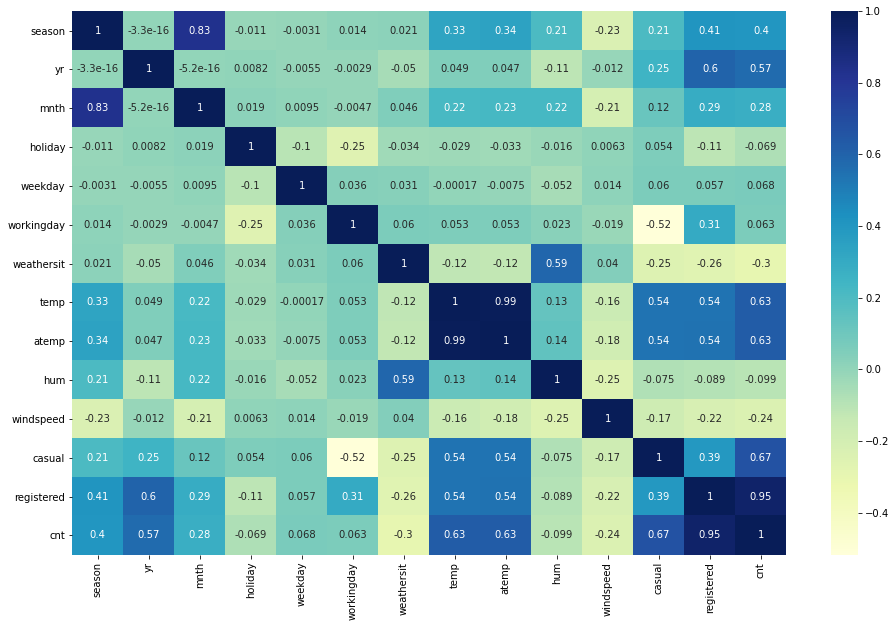

In [233]:
plt.figure(figsize=(16,10))
sns.heatmap(day_df.corr(), annot=True, cmap="YlGnBu")
plt.show()

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

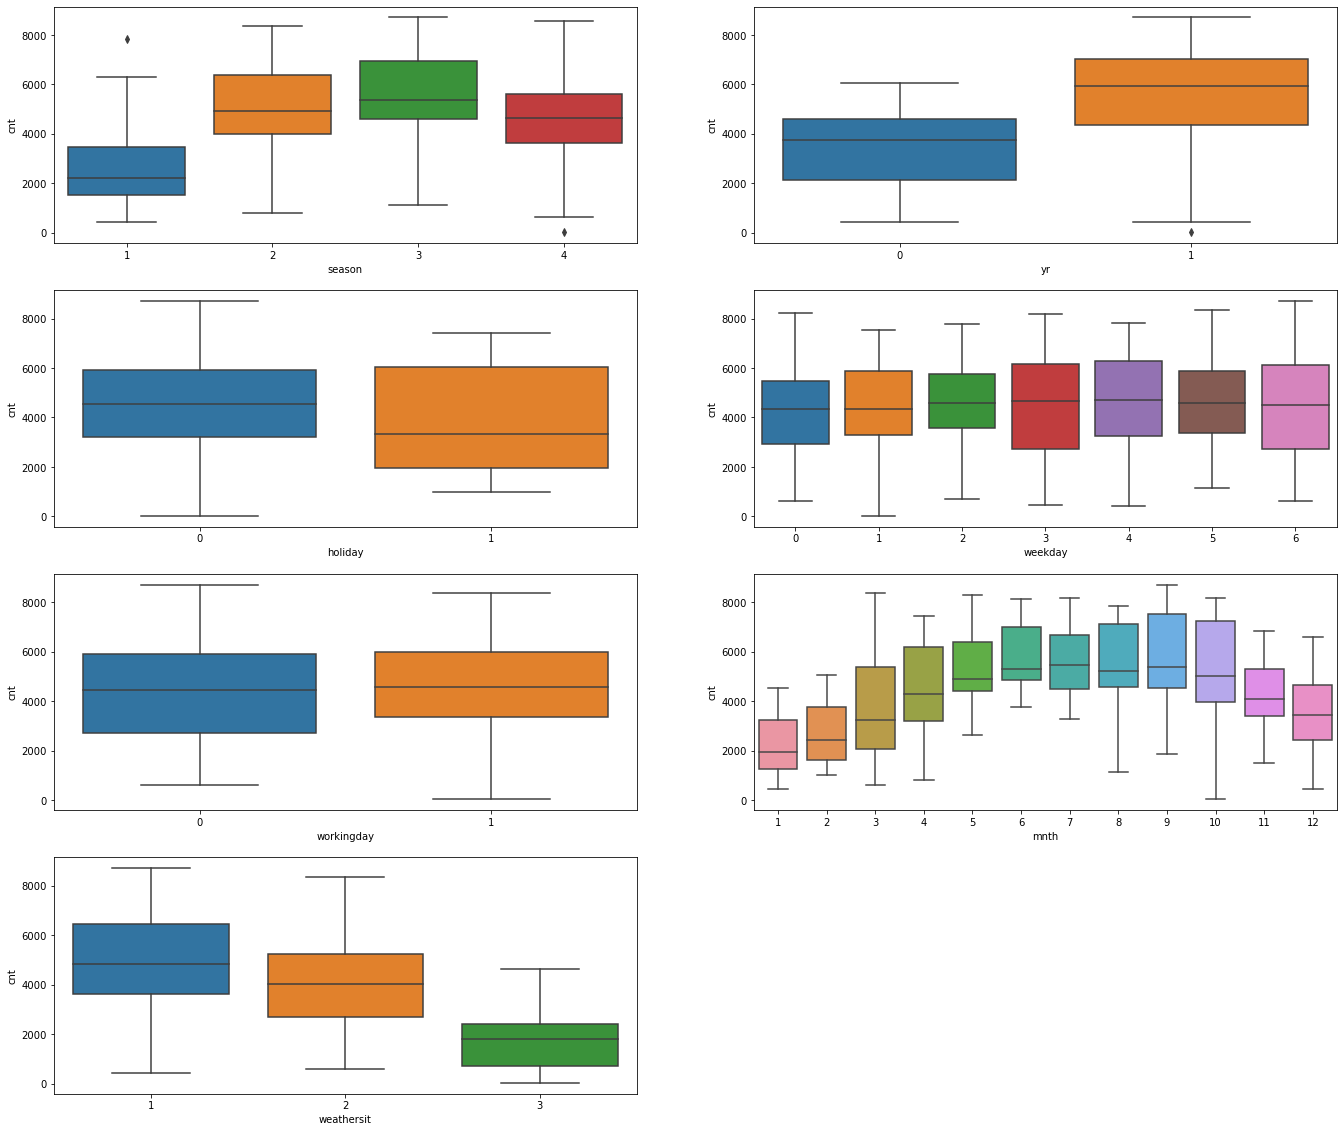

In [234]:
# visualiziong catogorical data

plt.figure(figsize=(23,20))
plt.subplot(4,2,1)
sns.boxplot(x="season", y="cnt", data=day_df)

plt.subplot(4,2,2)
sns.boxplot(x="yr", y="cnt", data=day_df)

plt.subplot(4,2,3)
sns.boxplot(x="holiday", y="cnt", data=day_df)

plt.subplot(4,2,4)
sns.boxplot(x="weekday", y="cnt", data=day_df)

plt.subplot(4,2,5)
sns.boxplot(x="workingday", y="cnt", data=day_df)

plt.subplot(4,2,6)
sns.boxplot(x="mnth", y="cnt", data=day_df)

plt.subplot(4,2,7)
sns.boxplot(x="weathersit", y="cnt", data=day_df)

   ### Observations 
    # Bike sharing is highest on Summer and Fall and least in Spring
    # Bike sharing is higher when the clouds are clearer or when its partly cloudy
    # Bikes are used less on hoiday
    # Atemp and Temp features are highly co-related 
    # Temp and Cnt are highly co-related 
    # Hum and Cnt are negatively highly co-related
    # 2019 had higher bike sharing than previous year 2018
    # This shows demand is increasing year over year 
    # Cnt decreases on a holiday
    # Cnt increases on working day
	# Cnt increases in June, July, Aug, Sep months 
	# Cnt is higher when the weather is clear/partly cloudy
	# Cnt decreases when its raining/snow
	# Cnt has increased in year 2019 compared to 2018

    

# Data Preparation

In [235]:
# After analyising and understanding business , I have decided to remove some unwanted data
# I feel casual and registered is not required and we have cnt feature
removal_features = ["dteday", "casual", "registered"]
day_df.drop(removal_features, axis=1, inplace=True)

In [236]:
day_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [237]:
# Adding dummies but before that as mentioned in problem, we need to add the values to categorical features

day_df.season = day_df.season.map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})

In [238]:
day_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [239]:
day_df.mnth = day_df.mnth.map({1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"June", 7:"July", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"})

In [240]:
day_df.weathersit = day_df.weathersit.map({1:'Clear',2:'Cloudy',3:'Light Rain',4:'Heavy Rain'})

In [241]:
day_df.weekday = day_df.weekday.map(({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"}))

In [242]:
# Adding Dummy variables
season_dummies = pd.get_dummies(day_df["season"], drop_first=True)
month_dummies =pd.get_dummies(day_df["mnth"],drop_first=True)
weather_dummies = pd.get_dummies(day_df["weathersit"],drop_first=True)
weekday_dummies = pd.get_dummies(day_df["weekday"],drop_first=True)

In [243]:
day_df = pd.concat([season_dummies, month_dummies, weather_dummies, weekday_dummies, day_df], axis=1)

In [244]:
day_df.head()

,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Saturday,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Sunday,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [245]:
day_df.drop(["season","mnth", "weathersit", "weekday"], axis=1, inplace=True)

In [246]:
day_df.shape

(730, 30)

In [247]:
day_df.head()

,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,...,Tuesday,Wednesday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [248]:
day_df.columns

Index(['spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'July',
       'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Cloudy', 'Light Rain',
       'Monday', 'Saturday', 'Sunday', 'Thrusday', 'Tuesday', 'Wednesday',
       'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt'],
      dtype='object')

# Splitting the data

In [249]:
train, test = train_test_split(day_df, train_size=0.7, random_state=100)

# Scaling the train data 

In [250]:
#1. Instantiate an object
scaler = MinMaxScaler()

In [251]:
#2. Create a list of list of numerical variables
num_features = ['cnt', 'temp', 'atemp', 'hum', 'windspeed']

In [252]:
train[num_features] = scaler.fit_transform(train[num_features])

In [253]:
train.describe()

,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,...,Tuesday,Wednesday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,...,0.131373,0.158824,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,...,0.338139,0.365870,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


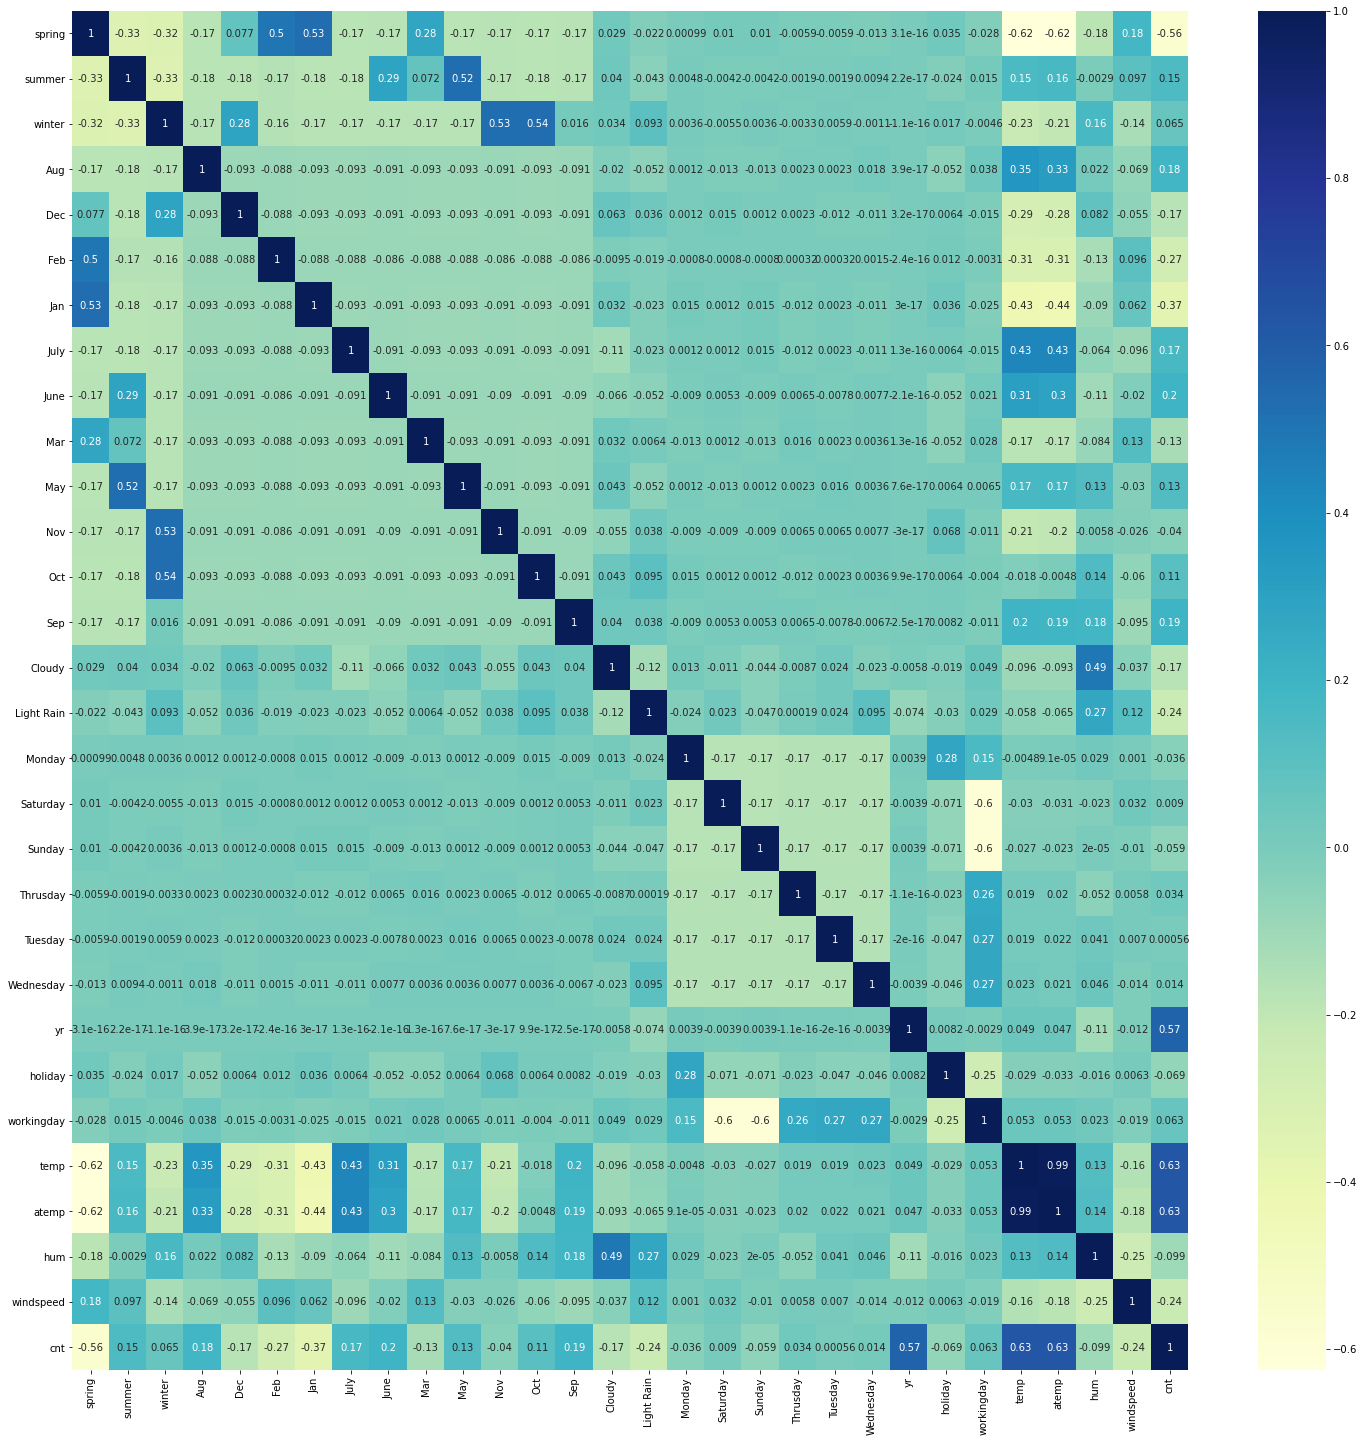

In [149]:
plt.figure(figsize=(25, 25))
sns.heatmap(day_df.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [254]:
# splitting data into X and y set
y_train = train.pop("cnt")
X_train = train

# Model building

In [255]:
X_train.head()

,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,...,Thrusday,Tuesday,Wednesday,yr,holiday,workingday,temp,atemp,hum,windspeed
576,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,1,0.815169,0.766351,0.725633,0.264686
426,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0.442393,0.438975,0.640189,0.255342
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106
482,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0.395666,0.391735,0.504508,0.188475
111,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.345824,0.318819,0.751824,0.380981


In [256]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [257]:
# Initially I want to use RFE method to find the best features I should use for model, 
# then I try to add and remove features based on my analysis using statsmodel, VIF to find a better model

In [258]:
# Initially I will start with 15 feartures using RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [259]:
rfe = RFE(lm, 15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [260]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 9),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 14),
 ('Mar', False, 15),
 ('May', False, 7),
 ('Nov', False, 2),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Cloudy', True, 1),
 ('Light Rain', True, 1),
 ('Monday', False, 8),
 ('Saturday', True, 1),
 ('Sunday', False, 6),
 ('Thrusday', False, 11),
 ('Tuesday', False, 10),
 ('Wednesday', False, 12),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1)]

 ## Starting with columns selected by RFE

In [261]:
# Selected columns
col = X_train.columns[rfe.support_]
col

Index(['spring', 'summer', 'winter', 'Jan', 'July', 'Sep', 'Cloudy',
       'Light Rain', 'Saturday', 'yr', 'holiday', 'workingday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

In [262]:
# Rejected columns
X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Monday',
       'Sunday', 'Thrusday', 'Tuesday', 'Wednesday', 'atemp'],
      dtype='object')

In [263]:
# selecting columns from train set and adding constant, here I am using stats model to get better understanding of featues and there significance
X_train_rfe = X_train[col]

X_train_rfe = sm.add_constant(X_train_rfe)

In [264]:
X_train_rfe.head()

,const,spring,summer,winter,Jan,July,Sep,Cloudy,Light Rain,Saturday,yr,holiday,workingday,temp,hum,windspeed
576,1.0,0,0,0,0,1,0,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,1.0,1,0,0,0,0,0,1,0,1,1,0,0,0.442393,0.640189,0.255342
728,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0.245101,0.498067,0.663106
482,1.0,0,1,0,0,0,0,1,0,1,1,0,0,0.395666,0.504508,0.188475
111,1.0,0,1,0,0,0,0,1,0,0,0,0,1,0.345824,0.751824,0.380981


In [265]:
lm1 = sm.OLS(y_train, X_train_rfe).fit()

In [266]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Mon, 14 Mar 2022   Prob (F-statistic):          4.22e-191
Time:                        19:06:03   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2519      0.036      6.969      0.000       0.181       0.323
spring        -0.0509      0.021     -2.464      0.014      -0.091      -0.010
summer         0.0508      0.015      3.423      0.001       0.022       0.080
winter         0.0933      0.017      5.403      0.000       0.059       0.127
Jan           -0.0345      0.017     -1.989      0.047      -0.069      -0.000
July          -0.0529      0.018     -2.931      0.004      -0.088      -0.017
Sep            0.0814      0.016      4.945      0.000       0.049       0.114
Cloudy        -0.0563      0.010     -5.439      0.000      -0.077      -0.036
Light Rain    -0.2475      0.026     -9.507      0.000      -0.299      -0.196
Saturday       0.0536      0.014      3.694      0.000       0.025       0.082
yr             0.2305      0.008     28.795      0.000       0.215       0.246
holiday       -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday     0.0433      0.012      3.762      0.000       0.021       0.066
temp           0.5096      0.034     14.837      0.000       0.442       0.577
hum           -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed     -0.1863      0.025     -7.310      0.000      -0.236      -0.136
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [267]:
# Calculating the VIFs
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,84.60
1,spring,5.08
13,temp,3.89
3,winter,3.59
2,summer,2.65
14,hum,1.91
12,workingday,1.88
9,Saturday,1.78
4,Jan,1.57
7,Cloudy,1.57


In [268]:
#spring has a higher VIF , dropping spring feature and checking the summary
X_train_rfe2 = X_train_rfe.drop(["spring"], axis=1)

In [269]:
# adding a constant variable 
X_train_rfe2 = sm.add_constant(X_train_rfe2)

In [270]:
lm2 = sm.OLS(y_train,X_train_rfe2).fit()

In [271]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     194.8
Date:                Mon, 14 Mar 2022   Prob (F-statistic):          5.98e-191
Time:                        19:06:44   Log-Likelihood:                 516.53
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     495   BIC:                            -939.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2011      0.030      6.739      0.000       0.142       0.260
summer         0.0757      0.011      6.950      0.000       0.054       0.097
winter         0.1255      0.011     11.081      0.000       0.103       0.148
Jan           -0.0393      0.017     -2.271      0.024      -0.073      -0.005
July          -0.0442      0.018     -2.486      0.013      -0.079      -0.009
Sep            0.0928      0.016      5.847      0.000       0.062       0.124
Cloudy        -0.0541      0.010     -5.221      0.000      -0.075      -0.034
Light Rain    -0.2433      0.026     -9.320      0.000      -0.295      -0.192
Saturday       0.0539      0.015      3.696      0.000       0.025       0.082
yr             0.2294      0.008     28.555      0.000       0.214       0.245
holiday       -0.0596      0.027     -2.206      0.028      -0.113      -0.007
workingday     0.0437      0.012      3.774      0.000       0.021       0.066
temp           0.5676      0.025     22.556      0.000       0.518       0.617
hum           -0.1659      0.037     -4.446      0.000      -0.239      -0.093
windspeed     -0.1935      0.025     -7.606      0.000      -0.243      -0.144
==============================================================================
Omnibus:                       60.708   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.130
Skew:                          -0.660   Prob(JB):                     3.35e-29
Kurtosis:                       5.104   Cond. No.                         20.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [272]:
# Calculating the VIFs
vif = pd.DataFrame()
X = X_train_rfe2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,57.07
12,temp,2.07
13,hum,1.89
11,workingday,1.88
8,Saturday,1.78
6,Cloudy,1.56
3,Jan,1.55
2,winter,1.53
4,July,1.43
1,summer,1.41


In [273]:
# dropping const as its VIF is higher than 5 and checking VIF 

X_train_rfe3 = X_train_rfe2.drop(["const"], axis=1)

In [274]:
# Calculating the VIFs
vif = pd.DataFrame()
X = X_train_rfe3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,hum,19.93
11,temp,12.67
10,workingday,5.10
13,windspeed,3.82
5,Cloudy,2.14
8,yr,2.05
1,winter,1.97
7,Saturday,1.92
0,summer,1.87
2,Jan,1.57


In [297]:
# dropping hum features as its VIF is higher and building a new model
X_train_rfe4 = X_train_rfe3.drop(["hum"], axis=1)

# adding a constant variable 
X_train_rfe4 = sm.add_constant(X_train_rfe4)

lm3 = sm.OLS(y_train,X_train_rfe4).fit()

In [298]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     200.6
Date:                Mon, 14 Mar 2022   Prob (F-statistic):          6.40e-188
Time:                        21:50:56   Log-Likelihood:                 506.55
No. Observations:                 510   AIC:                            -985.1
Df Residuals:                     496   BIC:                            -925.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1075      0.022      4.989      0.000       0.065       0.150
summer         0.0737      0.011      6.649      0.000       0.052       0.096
winter         0.1156      0.011     10.218      0.000       0.093       0.138
Jan           -0.0453      0.018     -2.574      0.010      -0.080      -0.011
July          -0.0372      0.018     -2.059      0.040      -0.073      -0.002
Sep            0.0886      0.016      5.490      0.000       0.057       0.120
Cloudy        -0.0805      0.009     -9.284      0.000      -0.098      -0.063
Light Rain    -0.2890      0.024    -11.822      0.000      -0.337      -0.241
Saturday       0.0590      0.015      3.988      0.000       0.030       0.088
yr             0.2334      0.008     28.699      0.000       0.217       0.249
holiday       -0.0573      0.028     -2.083      0.038      -0.111      -0.003
workingday     0.0470      0.012      3.994      0.000       0.024       0.070
temp           0.5384      0.025     21.756      0.000       0.490       0.587
windspeed     -0.1627      0.025     -6.524      0.000      -0.212      -0.114
==============================================================================
Omnibus:                       60.484   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.921
Skew:                          -0.660   Prob(JB):                     6.14e-29
Kurtosis:                       5.091   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [299]:
# Calculating the VIFs
vif = pd.DataFrame()
X = X_train_rfe4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,28.69
12,temp,1.93
11,workingday,1.87
8,Saturday,1.77
3,Jan,1.54
2,winter,1.47
4,July,1.42
1,summer,1.41
5,Sep,1.19
10,holiday,1.16


In [278]:
# I tried removing temp feature but the model predictability had dropped drastically, so keeping it as it is as temp is an important feature for the prediction.
# tried adding hum later but it didn't give better results, so finalysing above model

# Residual Analysis of train data

In [279]:
y_train_pred = lm3.predict(X_train_rfe4)

Text(0.5, 0, 'Errors')

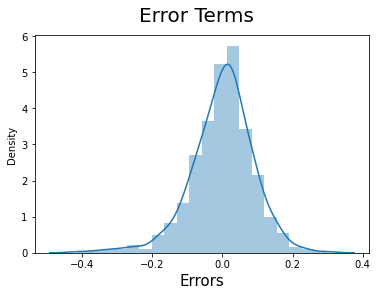

In [280]:
# Plot the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 15) 

In [281]:
# Errors are normally distributed 

# Predictions on test data

In [282]:
# scaling test data
test[num_vars] = scaler.transform(test[num_vars])

In [283]:
test.describe()

,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,...,Tuesday,Wednesday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,...,0.168182,0.100000,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154
std,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,...,0.374881,0.300684,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


In [284]:
# diving test set into X_test and y_test

y_test = test.pop("cnt")
X_test = test

In [285]:
# adding a constant variable 
X_test = sm.add_constant(X_test)

In [286]:
X_test.head()

,const,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,...,Thrusday,Tuesday,Wednesday,yr,holiday,workingday,temp,atemp,hum,windspeed
184,1.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0.831783,0.769660,0.657364,0.084219
535,1.0,0,1,0,0,0,0,0,0,1,...,0,0,1,1,0,1,0.901354,0.842587,0.610133,0.153728
299,1.0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0.511964,0.496145,0.837699,0.334206
221,1.0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0.881625,0.795343,0.437098,0.339570
152,1.0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0.817246,0.741471,0.314298,0.537414


In [288]:
X_train_rfe4.columns

Index(['const', 'summer', 'winter', 'Jan', 'July', 'Sep', 'Cloudy',
       'Light Rain', 'Saturday', 'yr', 'holiday', 'workingday', 'temp',
       'windspeed'],
      dtype='object')

In [289]:
# using features used in last model
X_test = X_test[['summer', 'winter', 'Jan', 'July', 'Sep', 'Cloudy',
       'Light Rain', 'Saturday', 'yr', 'holiday', 'workingday', 'temp',
       'windspeed']]

In [290]:
X_test = sm.add_constant(X_test)

In [291]:
# using r2 squared to find the prediction result
y_pred = lm3.predict(X_test)

In [292]:
r2_score(y_test, y_pred)

0.7938439600216975

# Model Evaluation

Text(0, 0.5, 'y_pred')

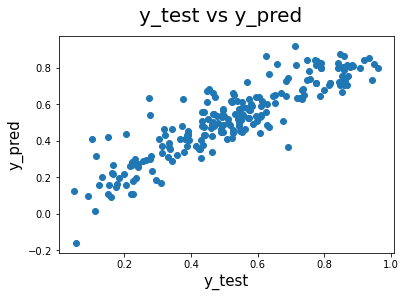

In [293]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=15)
plt.ylabel('y_pred', fontsize=15) 

In [294]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

0.0098572025176746

In [295]:
# mean squared error is very low

# Equation for best fitting line

In [296]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     200.6
Date:                Mon, 14 Mar 2022   Prob (F-statistic):          6.40e-188
Time:                        19:27:14   Log-Likelihood:                 506.55
No. Observations:                 510   AIC:                            -985.1
Df Residuals:                     496   BIC:                            -925.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1075      0.022      4.989      0.000       0.065       0.150
summer         0.0737      0.011      6.649      0.000       0.052       0.096
winter         0.1156      0.011     10.218      0.000       0.093       0.138
Jan           -0.0453      0.018     -2.574      0.010      -0.080      -0.011
July          -0.0372      0.018     -2.059      0.040      -0.073      -0.002
Sep            0.0886      0.016      5.490      0.000       0.057       0.120
Cloudy        -0.0805      0.009     -9.284      0.000      -0.098      -0.063
Light Rain    -0.2890      0.024    -11.822      0.000      -0.337      -0.241
Saturday       0.0590      0.015      3.988      0.000       0.030       0.088
yr             0.2334      0.008     28.699      0.000       0.217       0.249
holiday       -0.0573      0.028     -2.083      0.038      -0.111      -0.003
workingday     0.0470      0.012      3.994      0.000       0.024       0.070
temp           0.5384      0.025     21.756      0.000       0.490       0.587
windspeed     -0.1627      0.025     -6.524      0.000      -0.212      -0.114
==============================================================================
Omnibus:                       60.484   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.921
Skew:                          -0.660   Prob(JB):                     6.14e-29
Kurtosis:                       5.091   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### cnt = 0.0737 * summer + 0.1156 * winter - 0.0453 x Jan - 0.0372 * July + 0.0886 * Sep - 0.0805 * Cloudy - 0.289 * Light Rain + 0.059 * Saturday + 0.2334 * yr - 0.0573 * holiday + 0.0470 * workingday + 0.5384 * temp - 0.1627 * windspeed 

* Temp has higher positive impact on demand of bikes 
* demand is higher in september 
* demand is lesser in holidays, and rainy days
* higher demand for bikes on working week days

In [301]:
res = lm3.resid

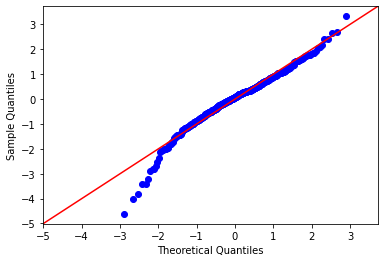

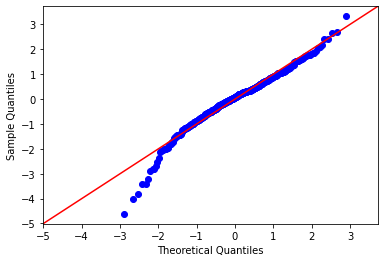

In [303]:
sm.qqplot(res, fit=True, line='45')

In [304]:
# In the above plot it is clear that errors are normally distributed